In [1]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


FILE_TO_DOWNLOAD =  "Salary_Data.csv"
DOWNLOAD_ROOT = "https://github.com/ect-info/ml/raw/master/"
DATA_PATH = "dados/"
DATA_URL = DOWNLOAD_ROOT + DATA_PATH + FILE_TO_DOWNLOAD

def fetch_data(data_url=DATA_URL, data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  if not os.path.isdir(data_path):
    os.makedirs(data_path)
  urllib.request.urlretrieve(data_url, data_path+"Salary_Data.csv")
  
  
fetch_data()
# observando se o diretório datasets foi criado com sucesso 
!ls dados

Salary_Data.csv


In [2]:
def load_data(data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  csv_path = os.path.join(data_path,file_to_download)
  return pd.read_csv(csv_path)

salary_data = load_data()
salary_data.tail(10)

,YearsExperience,Salary
20,6.8,91738.0
21,7.1,98273.0
22,7.9,101302.0
23,8.2,113812.0
24,8.7,109431.0
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [3]:
# Separando os dados para a variável independente e para variável dependete 
exp_years = salary_data.iloc[:,:-1].values
salary_value = salary_data.iloc[:, 1].values

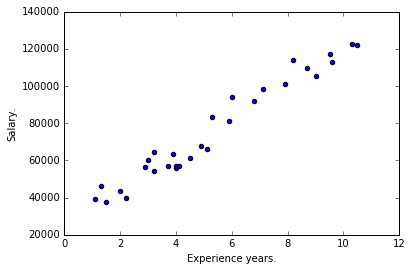

In [4]:
#Primeiro plot com os dados processados a partir do dataset proposto
plt.scatter(exp_years, salary_value)
plt.xlabel("Experience years.")
plt.ylabel("Salary.")
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [6]:
#separando dados para teste, e treino
exp_train, salary_train = exp_years[:20,:], salary_value[:20]
exp_test, salary_test = exp_years[-10:,:], salary_value[-10:]


In [7]:
#treinando modelo
lr.fit(exp_train, salary_train)
#previsão
lr.predict(exp_test)

array([  88566.97658422,   91301.81084443,   98594.70220499,
        101329.53646519,  105887.59356554,  108622.42782575,
        113180.48492609,  114092.09634616,  120473.37628665,
        122296.59912679])

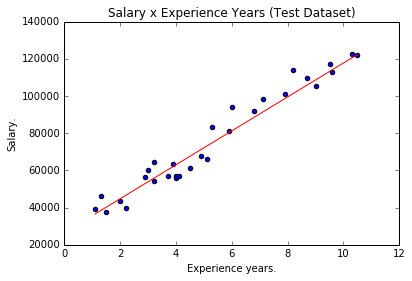

In [8]:
#plot do modelo
plt.scatter(exp_years, salary_value)
plt.plot(exp_years, lr.predict(exp_years), c='r')
plt.title("Salary x Experience Years (Test Dataset)")
plt.xlabel("Experience years.")
plt.ylabel("Salary.")
plt.show()

In [9]:
#verificando eficacia do modelo
print("Score for this dataset: ", lr.score(exp_years, salary_value)) #95%

('Score for this dataset: ', 0.95441693258330251)


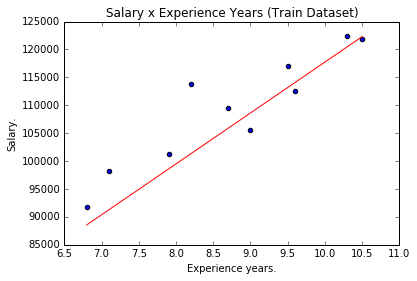

In [10]:
#plot do modelo
plt.scatter(exp_test, salary_test)
plt.plot(exp_test, lr.predict(exp_test), c='r')
plt.title("Salary x Experience Years (Train Dataset)")
plt.xlabel("Experience years.")
plt.ylabel("Salary.")
plt.show()

In [11]:
#verificando eficacia do modelo para os dados de treino
print("Score for this dataset: ", lr.score(exp_test, salary_test)) #95%

('Score for this dataset: ', 0.71542638935790137)


In [12]:
#aplicando modelo suport vector regression
from sklearn.svm import SVR

In [13]:
svr = SVR(kernel='poly', C=10.0)
svr.fit(exp_years, salary_value)

SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

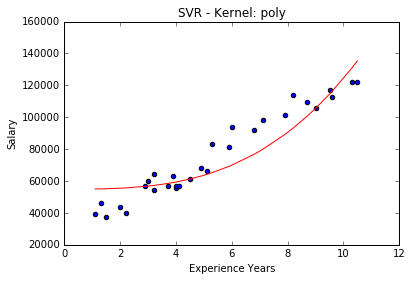

In [14]:
plt.scatter(exp_years, salary_value)
plt.plot(exp_years, svr.predict(exp_years), c='r')
plt.title("SVR - Kernel: poly")
plt.xlabel("Experience Years")
plt.ylabel("Salary")
plt.show()